In [77]:
import numpy as np
import pandas as pd
import main

rigis = pd.read_csv(main.data_dir + "\\rigis.csv", delimiter=';')
del rigis['Пласт РИГИС']
del rigis['Пластпропласт']
del rigis['Литология']
del rigis['Коллектор']

rigis = rigis.rename(columns={'Скважина': 'well_name'})
rigis = rigis.rename(columns={'Абсолютная глубина': 'z_abs'})
rigis = rigis.rename(columns={'Абсолютная толщина': 'h_abs'})
rigis = rigis.rename(columns={'Глубина кровли пласта': 'z'})
rigis = rigis.rename(columns={'Толщина': 'h'})

rigis.head()

,well_name,z,h,z_abs,h_abs
0,334,2 748.60,1.0,2 530.41,1.0
1,334,2 749.60,1.2,2 531.41,1.2
2,334,2 750.80,0.4,2 532.61,0.4
3,358,2 677.60,0.6,2 532.72,0.6
4,334,2 751.20,0.4,2 533.01,0.4


In [78]:
rigis.replace(' ', '', regex=True, inplace=True)
rigis['z_abs'] = rigis['z_abs'].astype('float64')
rigis['h_abs'] = rigis['h_abs'].astype('float64')
rigis['z'] = rigis['z'].astype('float64')
rigis['h'] = rigis['h'].astype('float64')
rigis.head()

,well_name,z,h,z_abs,h_abs
0,334,2748.6,1.0,2530.41,1.0
1,334,2749.6,1.2,2531.41,1.2
2,334,2750.8,0.4,2532.61,0.4
3,358,2677.6,0.6,2532.72,0.6
4,334,2751.2,0.4,2533.01,0.4


In [79]:
coord_data = pd.read_csv(main.data_dir + "\coord.csv", delimiter=';')
coord_data = coord_data.rename(columns={'num': 'well_name'})
coord_data = coord_data.rename(columns={'x': 'X-Coord'})
coord_data = coord_data.rename(columns={'y': 'Y-Coord'})
del coord_data['well']
del coord_data['field']
del coord_data['z']
del coord_data['plastorig']
coord_data.info()
coord_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
well_name    241 non-null object
X-Coord      241 non-null object
Y-Coord      241 non-null object
dtypes: object(3)
memory usage: 5.7+ KB


,well_name,X-Coord,Y-Coord
0,100,355 010.66,6 470 170.74
1,101,354 605.75,6 471 639.69
2,102,355 094.59,6 470 636.37
3,103,354 278.80,6 470 942.75
4,103ST2,354 089.59,6 470 137.60
5,104,354 234.53,6 471 358.12
6,105,356 138.19,6 470 536.88
7,106,355 534.11,6 471 397.33
8,107,353 360.93,6 471 143.96
9,108,354 807.68,6 472 113.04


In [46]:
#coord_data[coord_data['well_name'] == '296R']
#coord_data = coord_data.drop(coord_data[coord_data['well_name'] == '296R'].index)

In [80]:
coord_data.replace(' ', '', regex=True, inplace=True)
coord_data['X-Coord'] = coord_data['X-Coord'].astype('float64')
coord_data['Y-Coord'] = coord_data['Y-Coord'].astype('float64')
coord_data.info()
header_data = coord_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
well_name    241 non-null object
X-Coord      241 non-null float64
Y-Coord      241 non-null float64
dtypes: float64(2), object(1)
memory usage: 5.7+ KB


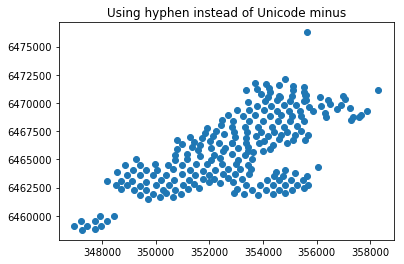

In [81]:
x_arr = coord_data['X-Coord']
y_arr = coord_data['Y-Coord']
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(x_arr, y_arr, 'o')
ax.set_title('Using hyphen instead of Unicode minus')
plt.show()

In [3]:
# header_data = pd.read_csv(main.data_dir + "\Well_Header.csv", delimiter='\t')
# header_data.head()
# header_data = header_data.rename(columns={'WellName': 'well_name'})
# del header_data['KB']
# del header_data['TopDepth']
# del header_data['BottomDepth']
# del header_data['Symbol']
# del header_data['Rig']
# del header_data['Field']
# header_data.head()
# header_data['well_name'].replace('314_', '', regex=True, inplace=True)
# header_data.replace(' ', '', regex=True, inplace=True)
# header_data['X-Coord'] = header_data['X-Coord'].astype('float64')
# header_data['Y-Coord'] = header_data['Y-Coord'].astype('float64')
# header_data.head()

,well_name,X-Coord,Y-Coord
0,314_103ST2,354719.52,6470051.42
1,314_107,354693.18,6470164.36
2,314_121,354433.25,6468384.38
3,314_125PL,354717.25,6470061.16
4,314_134,354478.44,6468306.61


In [82]:
rigis = pd.merge(rigis, header_data, on='well_name')
rigis.head()

,well_name,z,h,z_abs,h_abs,X-Coord,Y-Coord
0,334,2748.6,1.0,2530.41,1.0,351177.11,6465019.99
1,334,2749.6,1.2,2531.41,1.2,351177.11,6465019.99
2,334,2750.8,0.4,2532.61,0.4,351177.11,6465019.99
3,334,2751.2,0.4,2533.01,0.4,351177.11,6465019.99
4,334,2751.6,1.0,2533.41,1.0,351177.11,6465019.99


In [83]:
top = rigis.groupby(['well_name'])['z'].min()

In [84]:
top_df =  top.to_frame().reset_index()
top_df.head()

,well_name,z
0,100,2709.4
1,101,3156.4
2,102,2792.8
3,103,2895.0
4,103ST2,2888.4


In [85]:
top_df = pd.merge(top_df, header_data, on='well_name')
top_df.head()
top_df.shape

(231, 4)

In [86]:
top_df.head()

,well_name,z,X-Coord,Y-Coord
0,100,2709.4,355010.66,6470170.74
1,101,3156.4,354605.75,6471639.69
2,102,2792.8,355094.59,6470636.37
3,103,2895.0,354278.80,6470942.75
4,103ST2,2888.4,354089.59,6470137.60


In [87]:
top_df.to_csv('top_df.csv', sep =';', columns = ['well_name', 'X-Coord', 'Y-Coord', 'z'], index = False, header =False,
             line_terminator = ';\n')

In [88]:
botom = rigis.groupby(['well_name'])['z'].max()
botom_df =  botom.to_frame().reset_index()
botom_df.head()

,well_name,z
0,100,2724.2
1,101,3170.8
2,102,2805.0
3,103,2910.0
4,103ST2,2905.6


In [89]:
rigis_h = rigis[['well_name', 'z', 'h']]
botom_df =  pd.merge(botom_df, rigis_h, on=['well_name', 'z'])
botom_df.head()

,well_name,z,h
0,100,2724.2,1.2
1,101,3170.8,1.2
2,102,2805.0,1.6
3,103,2910.0,1.6
4,103ST2,2905.6,3.0


In [90]:
botom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 230
Data columns (total 3 columns):
well_name    231 non-null object
z            231 non-null float64
h            231 non-null float64
dtypes: float64(2), object(1)
memory usage: 7.2+ KB


In [91]:
botom_df['z'] = botom_df['z'] + botom_df['h']

In [92]:
del botom_df['h']
botom_df.head()

,well_name,z
0,100,2725.4
1,101,3172.0
2,102,2806.6
3,103,2911.6
4,103ST2,2908.6


In [93]:
botom_df = pd.merge(botom_df, header_data, on='well_name')
botom_df.head()
# bottom_df.shape

,well_name,z,X-Coord,Y-Coord
0,100,2725.4,355010.66,6470170.74
1,101,3172.0,354605.75,6471639.69
2,102,2806.6,355094.59,6470636.37
3,103,2911.6,354278.80,6470942.75
4,103ST2,2908.6,354089.59,6470137.60


In [94]:
botom_df.to_csv('bottom_df.csv', sep =';', columns = ['well_name', 'X-Coord', 'Y-Coord', 'z'], index = False, header =False,
             line_terminator = ';\n')